Antes de começar é necessário instalar as bibliotecas Pandas e Matplotlib

O script abaixo remove linhas duplicadas

In [130]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('./googleplaystore.csv')
clean_df = df.drop_duplicates(subset="App")
display(clean_df)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Ordenando o resultado pelo número de instalações e ignorando o primeiro retorno por ser um valor com "Free" na coluna "Installs"
Após isso, cria um grafíco de barras mostrando a avaliação de cada um, seguido por seu id.

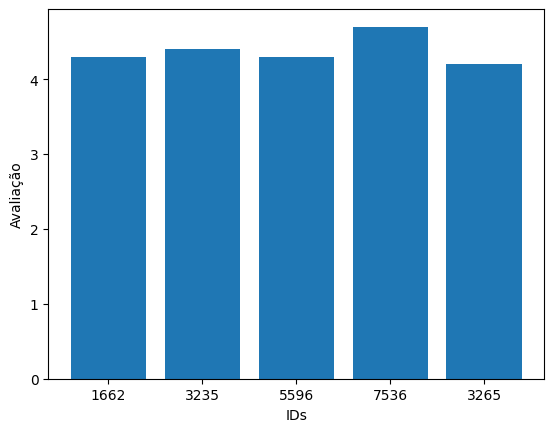

In [129]:
sorted_df = clean_df.sort_values(by="Installs", ascending=False).head(6)[1:6];
plt.bar(range(len(sorted_df)), sorted_df["Rating"]);
plt.xticks(range(len(sorted_df)), sorted_df.index);
plt.xlabel("IDs");
plt.ylabel("Avaliação");
plt.show();

Primeiro as categorias são separadas, depois são contadas e plotadas.

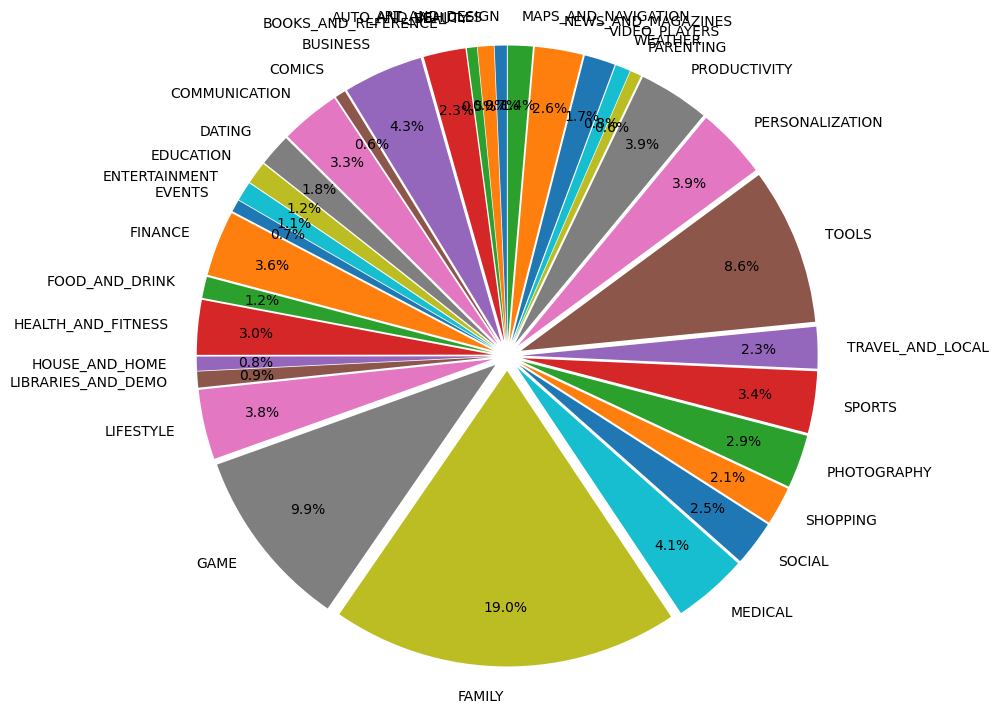

In [128]:
categories = clean_df["Category"].unique()
clean_categories = categories[:len(categories)-1:]
categories_count = []
for item in clean_categories:
    categories_count.append((clean_df.loc[clean_df["Category"] == item, "Category"].value_counts()).tolist()[0])
plt.pie(categories_count, pctdistance=0.8,explode=[0.1]*len(clean_categories), labels=clean_categories, startangle=90, radius=2, autopct="%.1f%%");


Os dados são filtrados e ordenados, depois é feito uma checagem para separar o mais caro.

In [131]:
paid_apps = clean_df.loc[(df.Price != "0") & (df.Type == "Paid")].sort_values(by="Price", ascending=False).values.tolist()
most_expensive_app = paid_apps[0]
for app in paid_apps:
    if int(float(app[7][1:])) > int(float(most_expensive_app[7][1:])):
        most_expensive_app = app
a = clean_df.loc[df["App"] == str(most_expensive_app[0])]
display(a)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,$400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


Um simples filtro por "Content Rating" e uma contagem

In [132]:
mature_apps = clean_df.loc[clean_df["Content Rating"] == "Mature 17+"]
display(mature_apps)
display(f"Total de Apps de 17+: {len(mature_apps)}")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
133,Dresses Ideas & Fashions +3000,BEAUTY,4.5,473,8.2M,"100,000+",Free,0,Mature 17+,Beauty,"March 1, 2017",1.0.2.0,1.6 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,"10,000+",Free,0,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up
166,Read books online,BOOKS_AND_REFERENCE,4.1,91615,23M,"5,000,000+",Free,0,Mature 17+,Books & Reference,"June 29, 2018",3.12,4.1 and up
170,Flybook,BOOKS_AND_REFERENCE,3.9,1778,4.9M,"500,000+",Free,0,Mature 17+,Books & Reference,"October 16, 2014",1.0.3,2.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,157k,100+,Paid,$0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10783,Modern Counter Terror Attack – Shooting Game,GAME,4.2,340,72M,"50,000+",Free,0,Mature 17+,Action,"October 27, 2017",1.0,4.1 and up
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


'Total de Apps de 17+: 393'

Primeiro a coluna "Reviews" precisa ser convertida para numerico, por estar em string. Após isso os dados são ordenados e plotados.

In [133]:
clean_df.Reviews = pd.to_numeric(clean_df.Reviews, errors="coerce")

sorted_by_reviews_df = clean_df.sort_values(by="Reviews", ascending=False).head(10)
display(sorted_by_reviews_df)

C:\Users\felp\AppData\Local\Temp\ipykernel_13868\463041059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.Reviews = pd.to_numeric(clean_df.Reviews, errors="coerce")


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1670,Clash of Clans,GAME,4.6,44891723.0,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526.0,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264.0,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3665,YouTube,VIDEO_PLAYERS,4.3,25655305.0,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999.0,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
1660,Clash Royale,GAME,4.6,23133508.0,97M,"100,000,000+",Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up


Dados são ordenados por "Reviews" e separado o top 1.

Dados são ordenador por "Rating" e separado o top 10 (pulando o primeiro retorno por ser um valor errado)

In [134]:
most_reviewed_app = clean_df.sort_values(by="Reviews", ascending=False).head(1)
print(f"O app mais avaliado é: {most_reviewed_app["App"].values[0]} com {most_reviewed_app['Reviews'].values[0]} reviews")

print("\nApps melhores avaliados:")
sorted_by_reviews_df = clean_df.sort_values(by="Rating", ascending=False).head(10)[1:11]
display(sorted_by_reviews_df)

O app mais avaliado é: Facebook com 78158306.0 reviews

Apps melhores avaliados:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10820,Fr. Daoud Lamei,FAMILY,5.0,22.0,8.6M,"1,000+",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up
10564,FK Dedinje BGD,SPORTS,5.0,36.0,2.6M,100+,Free,0,Everyone,Sports,"February 11, 2017",1.1,4.0 and up
10602,South Florida AA Meetings,LIFESTYLE,5.0,10.0,21M,"1,000+",Free,0,Everyone,Lifestyle,"May 24, 2018",2.18,4.1 and up
10609,"Trinity Church Deltona, FL",LIFESTYLE,5.0,33.0,28M,500+,Free,0,Everyone,Lifestyle,"May 7, 2018",1.9.0.0,2.3.3 and up
10611,"Beacon Baptist Jupiter, FL",LIFESTYLE,5.0,14.0,2.6M,100+,Free,0,Everyone,Lifestyle,"October 13, 2017",2.4,4.0.3 and up
10621,Florida Beach Wallpapers HD,TRAVEL_AND_LOCAL,5.0,3.0,12M,100+,Free,0,Everyone,Travel & Local,"December 30, 2015",1.8.1,4.1 and up
1547,Eternal life,LIBRARIES_AND_DEMO,5.0,26.0,2.5M,"1,000+",Free,0,Everyone,Libraries & Demo,"May 24, 2018",1.0,1.6 and up
10656,Wallpapers FN SCAR H,PERSONALIZATION,5.0,4.0,9.2M,100+,Free,0,Teen,Personalization,"April 12, 2018",1.0,4.1 and up


Duas tabelas não utilizadas anteriormente, com os dados já adquiridos.

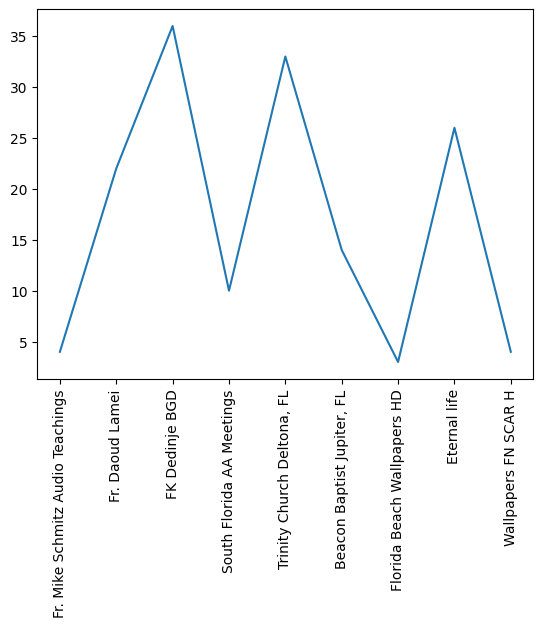

In [155]:
plt.plot(sorted_by_reviews_df.App, sorted_by_reviews_df.Reviews);
plt.xticks(rotation=90,);
plt.show();

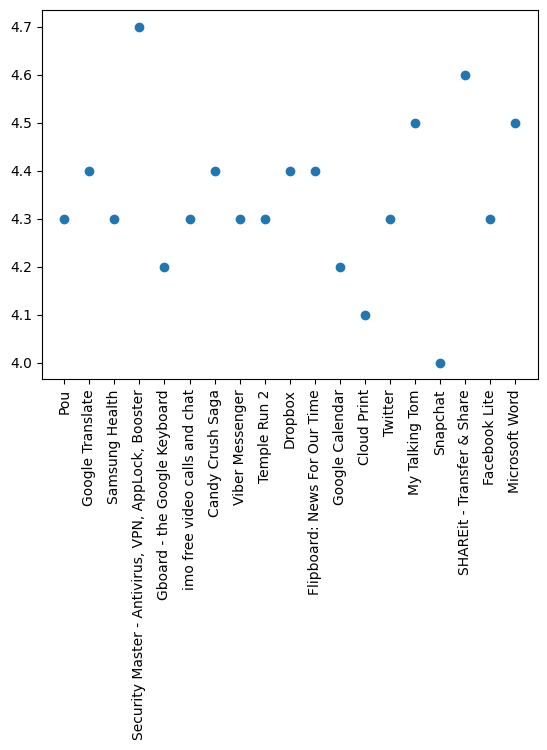

In [161]:
sorted_df = clean_df.sort_values(by="Installs", ascending=False).head(20)[1:21];
plt.scatter(sorted_df.App, sorted_df.Rating);
plt.xticks(rotation=90);
plt.show();